In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_excel(r"C:\Users\victo\Downloads\HREmployeeData.xlsx")

In [7]:
# Write a function  to extract the data, 
# and print some important info
def extract(file_path):
    #read the file into memory
    data = pd.read_excel(file_path)
    #print details about the file
    print(f"Here ia s little bit of information about the data stored in {file_path}:")
    print(f"\nThere are {data.shape[0]} rows and {data.shape[1]} columns in this DataFrame.")
    print("\nThe columns in this DataFrame take the following types: ")
    
    #print the type of each columns
    print(data.dtypes)
    
    # Finally, print a msg before returning the DataFrame
    print("\nTo view the DataFrame extracted from {file_path}, display the value returened by this function!\n\n")
    
    return data

# Call the function(create dataframe)
data = extract(r"C:\Users\victo\Downloads\HREmployeeData.xlsx")

# Take a peek at the dataframe
data

Here ia s little bit of information about the data stored in C:\Users\victo\Downloads\HREmployeeData.xlsx:

There are 1470 rows and 14 columns in this DataFrame.

The columns in this DataFrame take the following types: 
Attrition                  int64
Age                        int64
BusinessTravel             int64
DistanceFromHome           int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
OverTime                   int64
StockOptionLevel           int64
TotalWorkingYears          int64
WorkLifeBalance            int64
YearsAtCompany             int64
YearsInCurrentRole         int64
YearsSinceLastPromotion    int64
dtype: object

To view the DataFrame extracted from {file_path}, display the value returened by this function!




,Attrition,Age,BusinessTravel,DistanceFromHome,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,1,41,2,1,4,2,5993,1,0,8,1,6,4,0
1,0,49,1,8,2,1,5130,0,1,10,3,10,7,1
2,1,37,2,2,3,2,2090,1,0,7,3,0,0,0
3,0,33,1,3,3,1,2909,1,0,8,3,8,7,3
4,0,27,2,2,2,1,3468,0,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,1,23,4,1,2571,0,1,17,3,5,2,0
1466,0,39,2,6,1,1,9991,0,1,9,3,7,7,1
1467,0,27,2,4,2,1,6142,1,1,6,3,6,2,0
1468,0,49,1,2,2,1,5390,0,0,17,2,9,6,0


<Axes: >

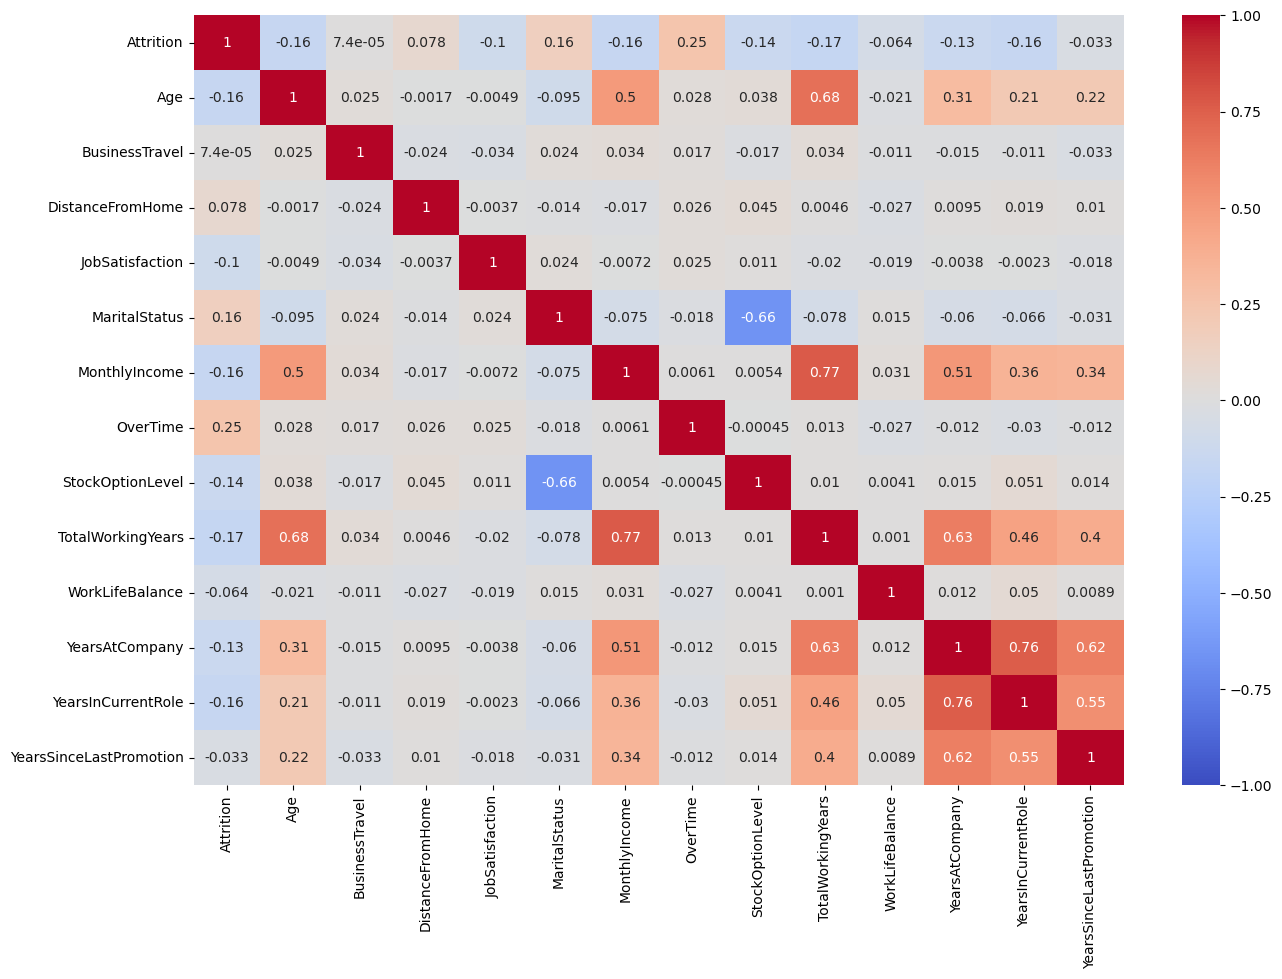

In [6]:
#To find relationship between variables
corr = data.corr()


plt.figure(figsize=(15,10))
plt.savefig('foo.png')
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0,cmap='coolwarm')

In [8]:
# Splitting data into features (X) and target variable (y)
X = data.drop(columns=["Attrition"])  # Features
y = data["Attrition"]  # Target variable

In [9]:
X.shape

(1470, 13)

In [10]:
y.shape

(1470,)

In [11]:
# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

In [12]:
X.head()

,Age,BusinessTravel,DistanceFromHome,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,2,1,4,2,5993,1,0,8,1,6,4,0
1,49,1,8,2,1,5130,0,1,10,3,10,7,1
2,37,2,2,3,2,2090,1,0,7,3,0,0,0
3,33,1,3,3,1,2909,1,0,8,3,8,7,3
4,27,2,2,2,1,3468,0,1,6,3,2,2,2


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train ', X_train.shape)
print('X_test ', X_test.shape)
print('y_train ', y_train.shape)
print('y_test ', y_test.shape)

X_train  (1176, 13)
X_test  (294, 13)
y_train  (1176,)
y_test  (294,)


In [16]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [17]:
# Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Feature importance using Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
# Print feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
                    Feature  Importance
5             MonthlyIncome    0.165915
0                       Age    0.114913
8         TotalWorkingYears    0.107480
2          DistanceFromHome    0.103978
10           YearsAtCompany    0.081028
6                  OverTime    0.079309
11       YearsInCurrentRole    0.061776
3           JobSatisfaction    0.058934
12  YearsSinceLastPromotion    0.055058
7          StockOptionLevel    0.049428
9           WorkLifeBalance    0.045243
4             MaritalStatus    0.044183
1            BusinessTravel    0.032753
